In [ ]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    #karyoplot(karyotype_file='karyotype.tsv',
                    #          busco_fulltable=version_fulltable,
                    #          output_file='karyoplot.png',
                    #          title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                    #          chrs_limit=100,
                    #          dpi=300)
                    os.chdir('..')

            #organism_busco_barplot(df=organism_tmp,
            #                       out_path="./",
            #                       filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    #organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

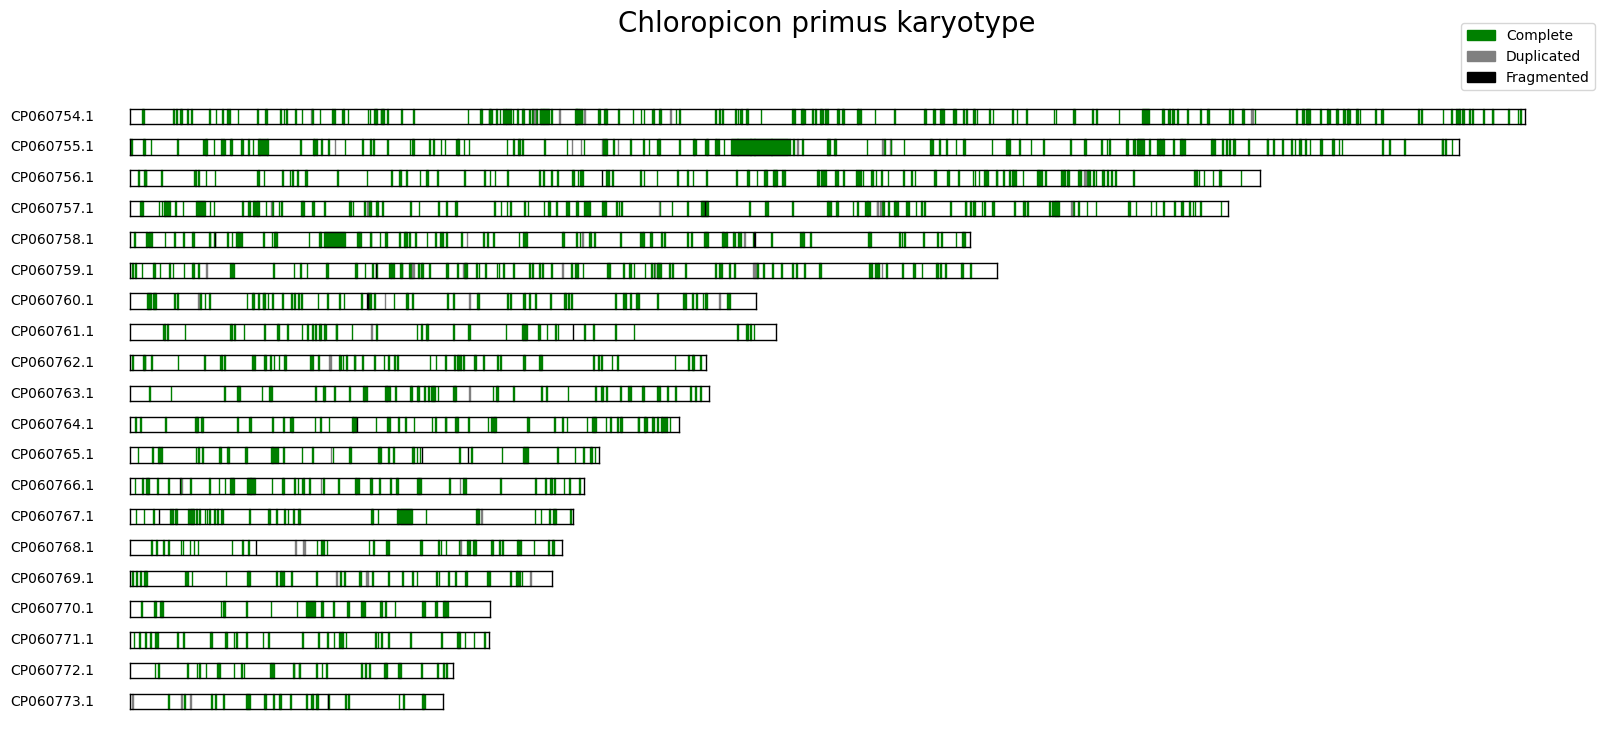

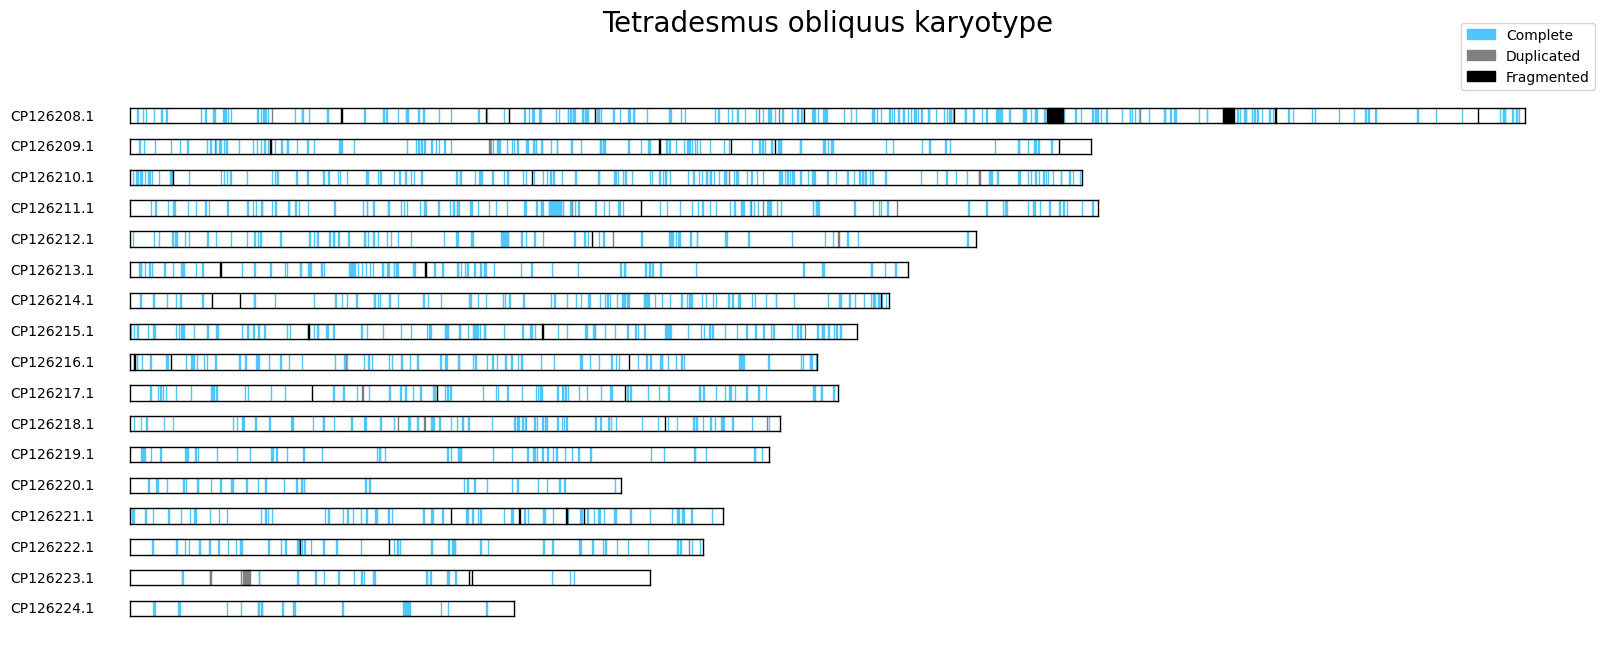

In [4]:
from buscoplotpy.graphics.karyoplot import karyoplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Chloropicon primus'

karyoplot(karyotype=karyotype,
          fulltable=full_table,
          title='karyotype',
          chrs_limit=500,
          dpi=100,
          plt_show=True,
          dim=2
)

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Tetradesmus_obliquus_5/GCA_030272055.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Tetradesmus_obliquus_5/GCA_030272055.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Tetradesmus obliquus'

karyoplot(karyotype=karyotype,
          fulltable=full_table,
          title='karyotype',
          chrs_limit=500,
          dpi=100,
          plt_show=True,
          dim=2,
          palette='azure'
)

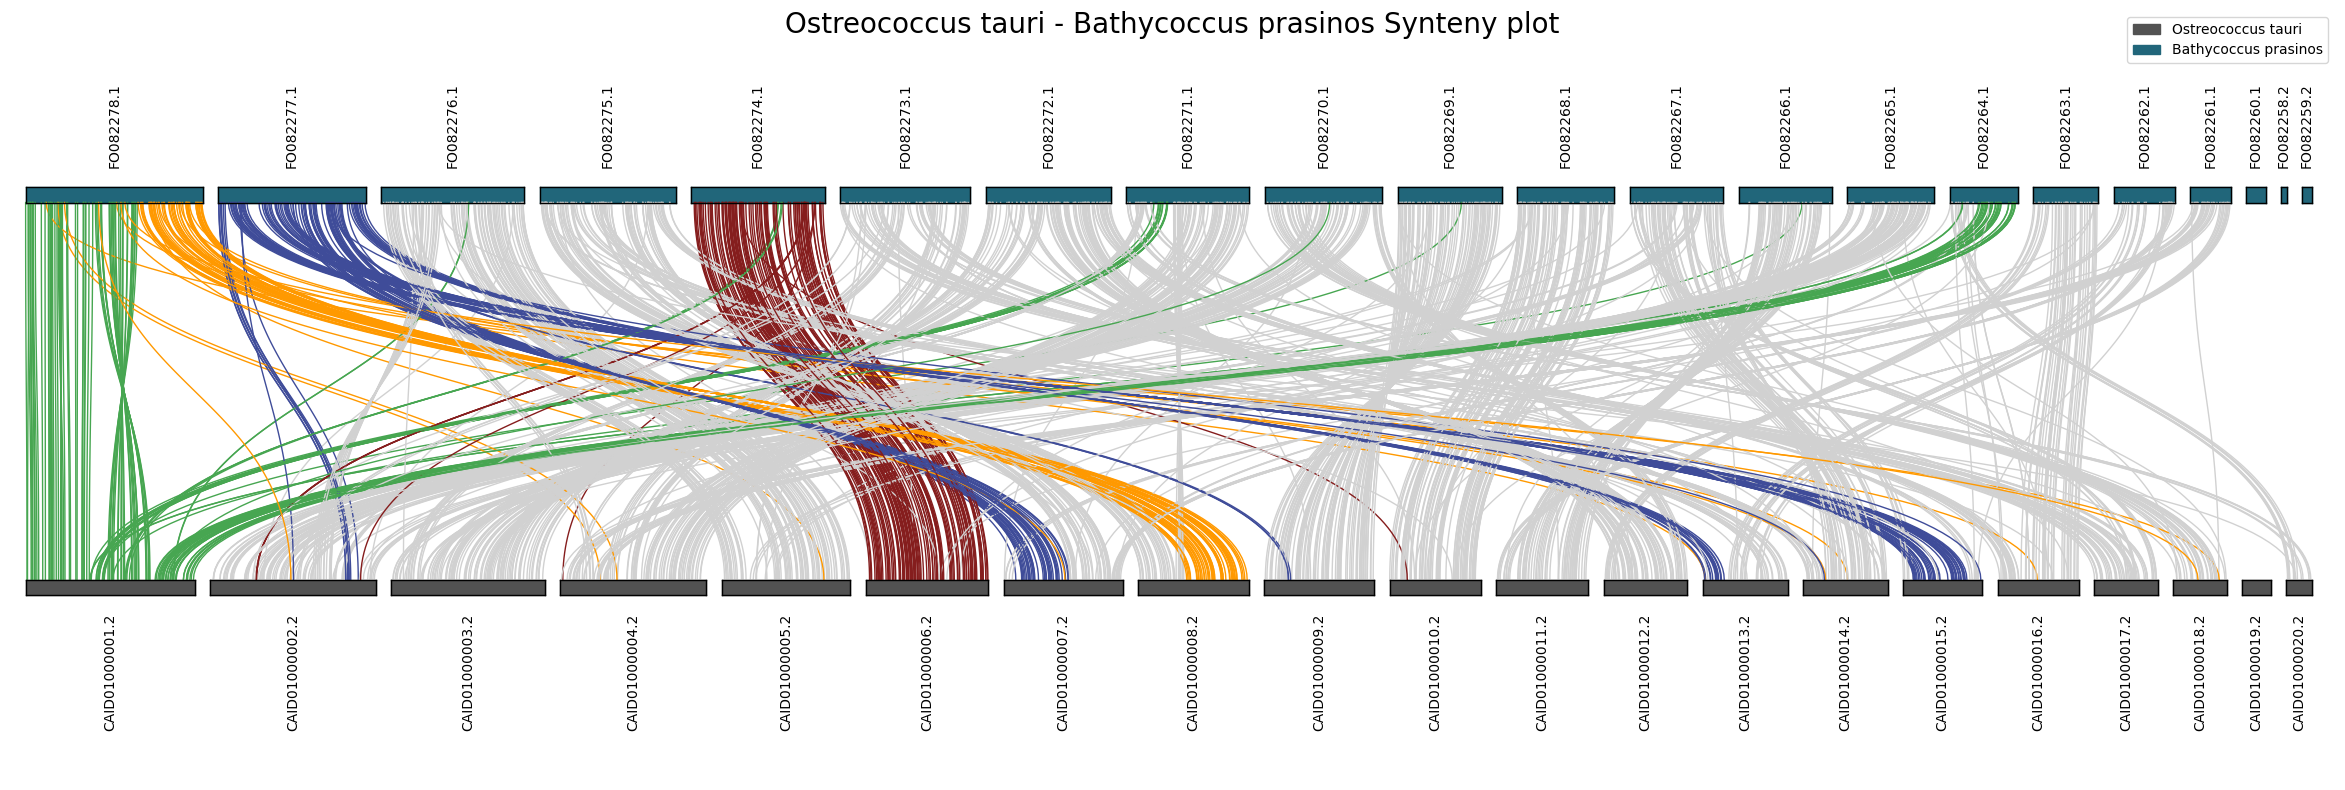

In [2]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

horizontal_synteny_plot(ft_1=ft_1, ft_2=ft_2, 
                        karyotype_1=karyotype_1, 
                        karyotype_2=karyotype_2, 
                        dim=2, figsize=(30, 10), 
                        link_colors=link_colors, 
                        round_edges=False, dpi=100, 
                        straight_line=False,
                        output_path='synteny.png',
                        plt_show=True)

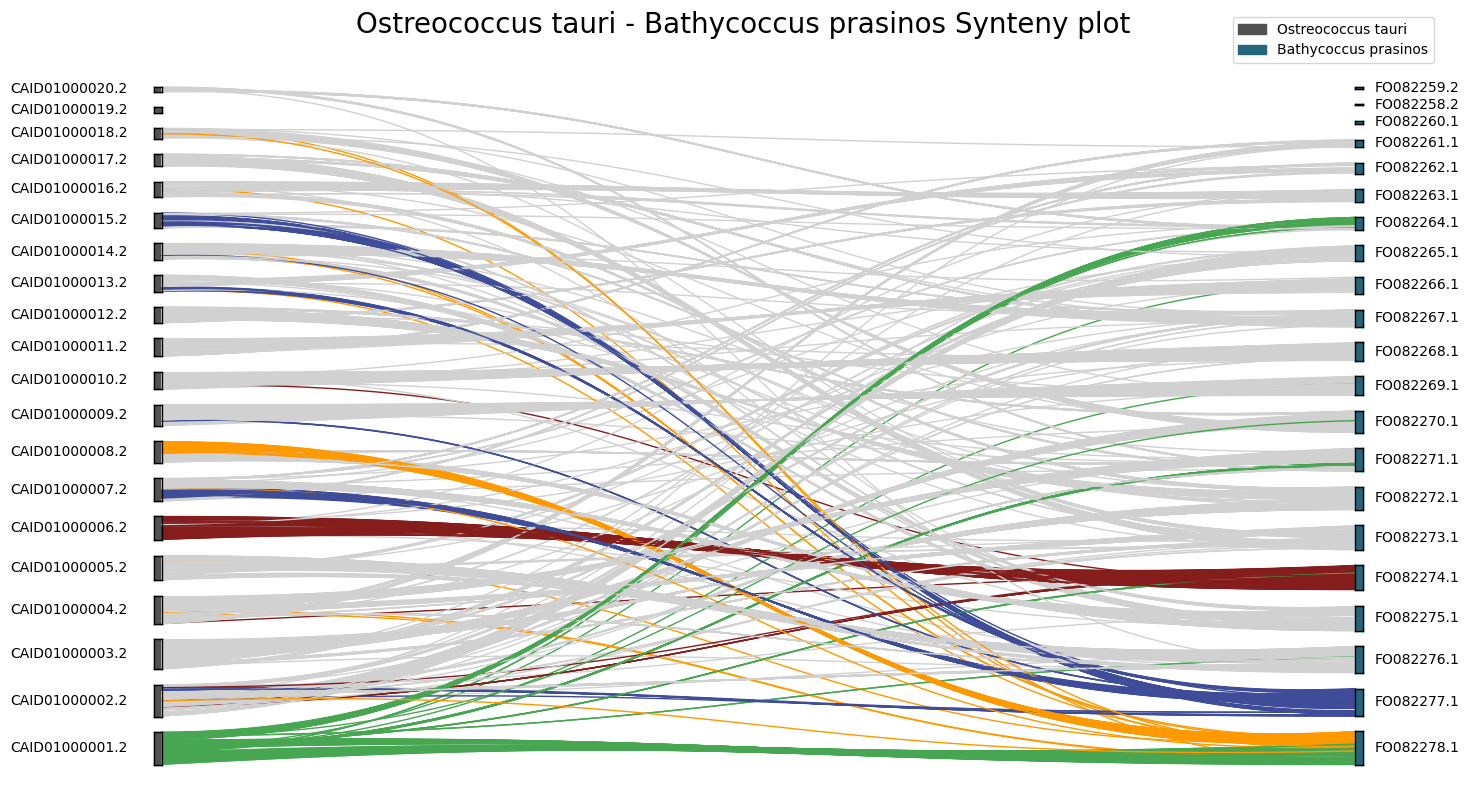

In [1]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

vertical_synteny_plot(ft_1=ft_1, ft_2=ft_2, karyotype_1=karyotype_1, karyotype_2=karyotype_2, dim=1, figsize=(18, 10), link_colors=link_colors, dpi=100, straight_line=False, output_path='Vsynteny.png', plt_show=True)

In [ ]:
from buscoplotpy.graphics.synteny import generate_links
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalyticstitle_test_data/busco_tmp/tree/Chlorophyta/Tetradesmus_obliquus_5/GCA_030272055.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

# Show all columns pandas
pd.set_option('display.max_columns', None)

generate_links(ft_1=ft_1, ft_2=ft_2)

,busco_id,status_x,sequence_x,gene_start_x,gene_end_x,strand_x,score_x,length_x,group_x,organism_x,genome_version_x,ortho_db_url_x,description_x,status_y,sequence_y,gene_start_y,gene_end_y,strand_y,score_y,length_y,group_y,organism_y,genome_version_y,ortho_db_url_y,description_y
0,15at3041,Complete,CP060754.1,1346635.0,1355367.0,+,3925.8,2000.0,,,,https://www.orthodb.org/v10?query=15at3041,Pre-mRNA-processing-splicing factor 8,Complete,CP126211.1,5069878.0,5091053.0,+,3956.8,2017.0,,,,https://www.orthodb.org/v10?query=15at3041,Pre-mRNA-processing-splicing factor 8
1,42at3041,Complete,CP060767.1,79795.0,83802.0,+,2063.6,1120.0,,,,https://www.orthodb.org/v10?query=42at3041,Magnesium chelatase subunit H,Complete,CP126211.1,7644368.0,7651468.0,+,2022.1,1103.0,,,,https://www.orthodb.org/v10?query=42at3041,Magnesium chelatase subunit H
2,45at3041,Complete,CP060754.1:557587-551636,551636.0,557587.0,-,1853.4,1471.0,,,,https://www.orthodb.org/v10?query=45at3041,DNA polymerase epsilon catalytic subunit,Complete,CP126208.1,6923818.0,6906852.0,-,1968.7,1546.0,,,,https://www.orthodb.org/v10?query=45at3041,DNA polymerase epsilon catalytic subunit
3,52at3041,Complete,CP060754.1,1077903.0,1082867.0,+,2316.3,1426.0,,,,https://www.orthodb.org/v10?query=52at3041,Clathrin heavy chain,Complete,CP126219.1,441978.0,459825.0,+,2218.7,1417.0,,,,https://www.orthodb.org/v10?query=52at3041,Clathrin heavy chain
4,64at3041,Complete,CP060757.1:100510-87977,87977.0,100510.0,-,800.6,1716.0,,,,https://www.orthodb.org/v10?query=64at3041,predicted protein,Complete,CP126209.1,3772416.0,3772955.0,+,174.0,91.0,,,,https://www.orthodb.org/v10?query=64at3041,predicted protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,12380at3041,Complete,CP060764.1:213220-213023,213023.0,213220.0,-,70.3,55.0,,,,https://www.orthodb.org/v10?query=12380at3041,Acyl-CoA-binding protein,Complete,CP126208.1,8554250.0,8554557.0,+,85.5,55.0,,,,https://www.orthodb.org/v10?query=12380at3041,Acyl-CoA-binding protein
1211,12450at3041,Complete,CP060765.1,592098.0,592688.0,+,69.5,122.0,,,,https://www.orthodb.org/v10?query=12450at3041,Multiple myeloma tumor-associated protein 2,Complete,CP126209.1,4464887.0,4465959.0,+,90.0,62.0,,,,https://www.orthodb.org/v10?query=12450at3041,Multiple myeloma tumor-associated protein 2
1212,12851at3041,Complete,CP060754.1:602333-602145,602145.0,602333.0,-,81.9,51.0,,,,https://www.orthodb.org/v10?query=12851at3041,Copper chaperone,Complete,CP126208.1,10985142.0,10984800.0,-,82.4,51.0,,,,https://www.orthodb.org/v10?query=12851at3041,Copper chaperone
1213,13024at3041,Complete,CP060760.1,250151.0,250273.0,+,101.1,40.0,,,,https://www.orthodb.org/v10?query=13024at3041,U1 small nuclear ribonucleoprotein C,Complete,CP126208.1,11031396.0,11032316.0,+,98.4,42.0,,,,https://www.orthodb.org/v10?query=13024at3041,U1 small nuclear ribonucleoprotein C
